In [2]:
from SPCCT_4D import Sample, Timepoint, Viewer, vesselDiameter

# Calling the bunny army
#s1 = Sample("1")
#s2 = Sample("2")
#s3 = Sample("3")
#s4 = Sample("4")
#s5 = Sample("5")
#s6 = Sample("6")

s7 = Sample("7")
s8 = Sample("8") 
s9 = Sample("9")
s10 = Sample("10")

# Dotarem data (HU)
#d1 = Sample("dotarem1")
#d2 = Sample("dotarem2")
#d3 = Sample("dotarem3")
#d4 = Sample("dotarem4")
#d5 = Sample("dotarem5")
#d6 = Sample("dotarem6")

Available directories:
0: 2021_01_27.4553.300.2024_03_18.AGUIX_Rabbit_10674_a00000
1: 2021_01_27.4553.400.2024_03_18.AGUIX_Rabbit_10674_a00001
2: 2021_01_27.4553.500.2024_03_18.AGUIX_Rabbit_10674_a00002
3: 2021_01_27.4553.600.2024_03_18.AGUIX_Rabbit_10674_a00003
4: 2021_01_27.4553.700.2024_03_18.AGUIX_Rabbit_10674_a00004
Conventional file 1 total DICOM files found: 480
Spectral/k_gadolinium file 1 total DICOM files found: 480
Conventional file 2 total DICOM files found: 480
Spectral/k_gadolinium file 2 total DICOM files found: 480
Conventional file 3 total DICOM files found: 480
Spectral/k_gadolinium file 3 total DICOM files found: 480
Conventional file 4 total DICOM files found: 480
Spectral/k_gadolinium file 4 total DICOM files found: 480
Conventional file 5 total DICOM files found: 480
Spectral/k_gadolinium file 5 total DICOM files found: 480
Available directories:
0: 2021_01_27.4555.300.2024_03_25.AGUIX_Rabbit_10308_b00000
1: 2021_01_27.4555.400.2024_03_18.AGUIX_Rabbit_10308_a00001

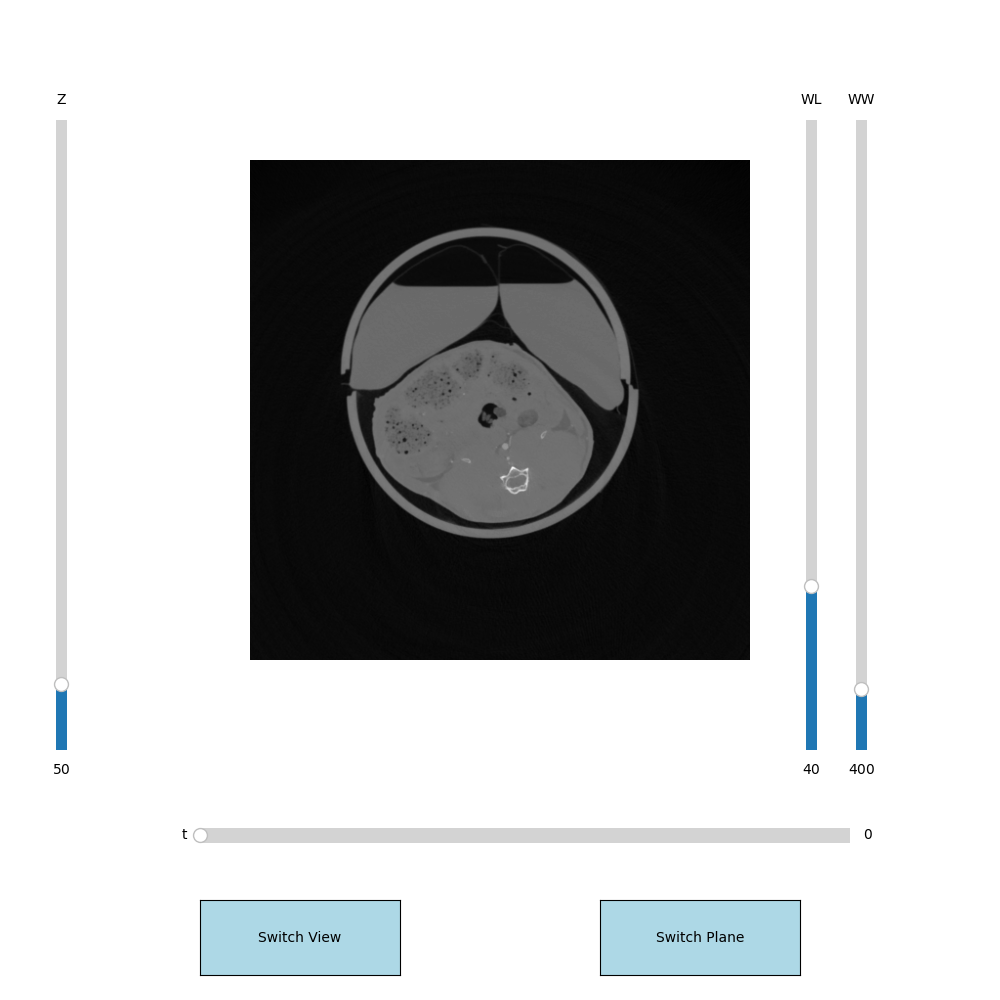

Processing the selection...
339
    Signal_HU    Noise_HU    CNR_HU  Signal_Kedge  Noise_Kedge  CNR_Kedge
0   41.355091   37.818182  0.068100      0.002245     0.000000        inf
1   81.161880  103.382155 -0.987338      0.261514     0.536566  -0.938805
2  125.250653  132.104377 -0.151910      0.951645     0.980909  -0.038174
3  165.488251  163.158249  0.043599      1.852585     1.646498   0.233568
4  103.357702  107.548822 -0.174013      0.607572     0.622626  -0.041145


c:\Users\Chris\OneDrive\2023\BME_M2\STAGE\Thesis\Scripts_and_venv\internship_M2\SPCCT_4D.py:337: RuntimeWarning: divide by zero encountered in scalar divide
  CNR_Kedge = (signal_Kedge - noise_Kedge) / np.std(kedge[washer_disk])
c:\Users\Chris\OneDrive\2023\BME_M2\STAGE\Thesis\Scripts_and_venv\internship_M2\SPCCT_4D.py:344: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.data = pd.concat([self.data, new_data], ignore_index=True)


In [83]:
%matplotlib widget
from SPCCT_4D import draw2D
vesselDiameter(s10)

In [126]:
%matplotlib widget
from SPCCT_4D import draw2D
import numpy as np
import pandas as pd
from skimage import morphology as MM
def apply2D(self, mask_path, data_point, slice_num):
        # Load the 2D mask
        sample = self
        mask = np.load(mask_path)
        mask =mask[:,:,0]
        mask = MM.erosion(mask, MM.disk(2))
        mask = np.where(mask == 1)
        data = pd.DataFrame(columns=["Mean_HU", "Std_HU", "Median_HU", "Min_HU", "Max_HU", "IQ1_HU", "IQ3_HU", 
                                          "Mean_Kedge", "Std_Kedge", "Median_Kedge", "Min_Kedge", "Max_Kedge", "IQ1_Kedge", "IQ3_Kedge"])

        # Get the corresponding slice of the conventional and kedge data
        conventional_slice = sample.acquisition[data_point].conventional[:, :, slice_num]
        if sample.acquisition[data_point].kedge is not None:
            kedge_slice = sample.acquisition[data_point].kedge[:, :, slice_num]
        else:
            kedge_slice = None

        # Ensure mask dimensions match the slice dimensions
        #if mask.shape != conventional_slice.shape:
        #    raise ValueError("Mask dimensions do not match the slice dimensions")

        # Placeholder for image data, replace with actual image data
        measurements = []

        # Compute statistics for the circular ROI
        for i in range(len(sample.acquisition)):
            conventional = sample.acquisition[i].conventional[:, :, slice_num]
            kedge = sample.acquisition[i].kedge[:, :, slice_num] if sample.acquisition[i].kedge is not None else None

            mean_HU = np.mean(conventional[mask])
            std_HU = np.std(conventional[mask])
            median_HU = np.median(conventional[mask])
            min_HU = np.min(conventional[mask])
            max_HU = np.max(conventional[mask])
            iq1_HU = np.percentile(conventional[mask], 25)
            iq3_HU = np.percentile(conventional[mask], 75)

            if kedge is None or (isinstance(kedge, np.ndarray) and np.isnan(kedge).any()):
                mean_Kedge, std_Kedge, median_Kedge, min_Kedge, max_Kedge, iq1_Kedge, iq3_Kedge = [np.nan] * 7
            else:
                mean_Kedge = np.mean(kedge[mask])
                std_Kedge = np.std(kedge[mask])
                median_Kedge = np.median(kedge[mask])
                min_Kedge = np.min(kedge[mask])
                max_Kedge = np.max(kedge[mask])
                iq1_Kedge = np.percentile(kedge[mask], 25)
                iq3_Kedge = np.percentile(kedge[mask], 75)

            # Append metrics to the list
            measurements.append([mean_HU, std_HU, median_HU, min_HU, max_HU, iq1_HU, iq3_HU,
                                 mean_Kedge, std_Kedge, median_Kedge, min_Kedge, max_Kedge, iq1_Kedge, iq3_Kedge])

        # Convert measurements list to a DataFrame and append it to self.data
        new_data = pd.DataFrame(measurements, columns=data.columns)
        data = pd.concat([data, new_data], ignore_index=True)
        print(data)
        data.to_csv("dataframe.csv", index=False)
#solution = d1
#solution.acquisition[1].conventional = solution.acquisition[0].conventional
#solution.acquisition[2].conventional = solution.acquisition[0].conventional
#solution.acquisition[3].conventional = solution.acquisition[0].conventional
#solution.acquisition[4].conventional = solution.acquisition[0].conventional
apply2D(s7, "Kidney_Masks/l_medulla_s7_178.npy", 1,  178)

      Mean_HU     Std_HU  Median_HU  Min_HU  Max_HU  IQ1_HU  IQ3_HU  \
0    1.111111  61.193472       21.0  -378.0    71.0   -19.0    42.0   
1  129.195556  15.311201      129.0    95.0   165.0   118.0   139.0   
2  137.586667  20.612678      135.0    95.0   178.0   123.0   156.0   
3  195.244444  16.331504      198.0   138.0   232.0   185.0   208.0   
4  152.422222  15.889744      152.0   102.0   187.0   142.0   163.0   

   Mean_Kedge  Std_Kedge  Median_Kedge  Min_Kedge  Max_Kedge  IQ1_Kedge  \
0    0.001422   0.008931          0.00       0.00       0.08       0.00   
1    0.948533   0.154500          0.92       0.76       1.40       0.82   
2    1.244444   0.307572          1.20       0.58       1.74       1.02   
3    2.240267   0.248669          2.34       1.48       2.58       2.04   
4    1.324711   0.180992          1.34       0.80       1.64       1.22   

   IQ3_Kedge  
0       0.00  
1       1.06  
2       1.54  
3       2.44  
4       1.44  


C:\Users\Chris\AppData\Local\Temp\ipykernel_16052\3310357747.py:60: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  data = pd.concat([data, new_data], ignore_index=True)


In [ ]:
%matplotlib widget
from matplotlib.widgets import Slider, Button, LassoSelector
vesselDiameter(s1, "C:/Users/Chris/OneDrive/2023/BME_M2/STAGE/Thesis/Scripts_and_venv/internship_M2/Kidney_Masks/r_cortex_s1_275.npy")

In [12]:
# Look at dicom metadata
import pydicom
file_path = "d://copyRaw//Rabbit_AGUIX_6//2021_01_27.4551.300.2024_03_18.AGUIX_Rabbit_10674_a00000//Spectral//k_gadolinium//0294.dcm"

#file_path = "D://copyRaw//Rabbit_AGUIX_dotarem1//2021_01_18.4500.500.2021_01_22.RABJAN00017//Conventional//dcm//0240.dcm"
medical_image = pydicom.read_file(file_path)
print(medical_image)

#print(.acquisition[1].kedge)

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 208
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: CT Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.840.113704.1.176244555.18446744072229114582.13250.52500.296
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.276.0.7230010.3.0.3.6.0
(0002, 0013) Implementation Version Name         SH: 'OFFIS_DCMTK_360'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'AXIAL', 'PHC_KEDGE_GD']
(0008, 0012) Instance Creation Date              DA: '20240319'
(0008, 0013) Instance Creation Time              TM: '002404'
(0008, 0016) SOP Class UID                       UI: CT Image Stor

c:\Users\Chris\OneDrive\2023\BME_M2\STAGE\Thesis\Scripts_and_venv\stageM2\Lib\site-packages\pydicom\valuerep.py:443: UserWarning: The value length (92) exceeds the maximum length of 64 allowed for VR LO.
  warnings.warn(msg)


1007.0
-1079.0


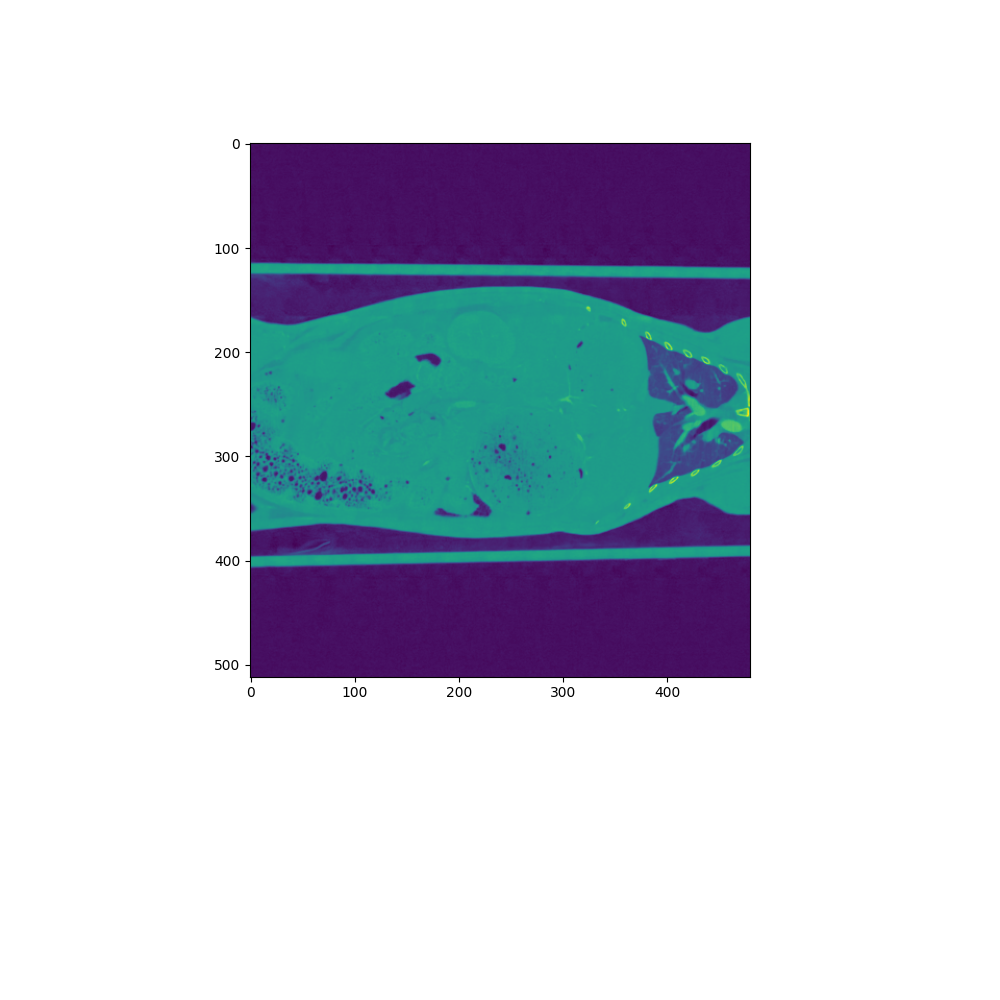

In [3]:
%matplotlib widget
import matplotlib.pyplot as plt
import numpy as np
viewS4 = s1
plt.clf()
plt.imshow(viewS4.acquisition[0].conventional[279,:,:])
print(np.max(viewS4.acquisition[0].conventional[279,:,:]))
print(np.min(viewS4.acquisition[0].conventional[279,:,:]))
#old_array = viewS4.acquisition[0].conventional
#plt.imshow(old_array[250,:,:])
plt.show()

In [1]:
from skimage import morphology as MM
from SPCCT_4D import Sample, Timepoint, Viewer, vesselDiameter
import pandas as pd
import numpy as np
import nrrd

def makeItEasy(slices, sample, mask):
    readdata, header = nrrd.read(mask)
    mask_data = np.swapaxes(readdata, 0, 1)

    if slices is None:
        slices = 240  # Default slice count

    # Determine the presence of the mask
    mask_presence = np.any(mask_data == 1, axis=(0, 1))
    first_presence = np.argmax(mask_presence)  # Index of first presence
    print(f"First presence in slice: {first_presence}")
    last_presence = len(mask_presence) - 1 - np.argmax(mask_presence[::-1])  # Last index where there's data
    print(f"Last presence in slice:{last_presence}")
    # Ensure that you do not exceed the number of available slices
    end_slice = min(first_presence + slices, mask_data.shape[2])
    start_slice = first_presence  # Start from the first detected mask presence

    # Adjust mask_data and conventional to the calculated slice range
    mask_data = mask_data[:, :, start_slice:end_slice]

    washer_disk = np.zeros_like(mask_data, dtype=bool)
    for i in range(mask_data.shape[2]):
        washer_disk[:, :, i] = MM.dilation(mask_data[:, :, i], MM.disk(3)) & ~mask_data[:, :, i]

    measurements = []

    for i in range(len(sample.acquisition)):
        conventional = sample.acquisition[i].kedge

        # Ensure conventional data matches the slice range of mask_data
        if conventional.shape[2] > start_slice + (end_slice - start_slice):
            conventional = conventional[:, :, start_slice:end_slice]

        indices = np.where(mask_data == 1)
        signal_HU = np.mean(conventional[indices])
        std_hu = np.std(conventional[indices])
        noise_indices = np.where(washer_disk == 1)
        noise_HU = np.mean(conventional[noise_indices])
        std_noise = np.std(conventional[noise_indices])

        pixel_volume = 0.5 * 0.5 * 0.5  # Voxel volume in mm³
        volume = np.sum(mask_data == 1) * pixel_volume
        normalized_signal = signal_HU / volume

        noise_volume = np.sum(washer_disk == 1) * pixel_volume
        normalized_noise = noise_HU / noise_volume

        cnr_hu = (signal_HU - noise_HU) / np.std(conventional[noise_indices])

        measurements.append({
            "Signal_HU": signal_HU, "STD_HU": std_hu,
            "Volume": volume,
            "Normalized_Signal": normalized_signal,
            "Noise_HU": noise_HU,
            "STD_Noise": std_noise,
            "Noise_Volume": noise_volume,
            "Normalized_Noise": normalized_noise,
            "CNR_HU": cnr_hu
        })

    data = pd.DataFrame(measurements)
    print(data)
    data.to_csv("dataframe.csv", index=False)

# Parameters
slices = 240
mask = "D:/3d_masks/kedge_ivc_t2_s6.seg.nrrd"
sample = Sample("1")
makeItEasy(slices, sample, mask)



c:\Users\Chris\OneDrive\2023\BME_M2\STAGE\Thesis\Scripts_and_venv\internship_M2\SPCCT_4D.py:40: SyntaxWarning: invalid escape sequence '\c'
  base_path = f"D:\copyRaw\Rabbit_AGUIX_" + rabbit_id


KeyboardInterrupt: 

In [19]:
from skimage import morphology as MM
%matplotlib widget
from SPCCT_4D import Sample, Timepoint, Viewer, vesselDiameter
import pandas as pd
import numpy as np
import nrrd

def makeItEasy(slices, sample, mask):
    readdata, header = nrrd.read(mask)
    mask_data = np.swapaxes(readdata, 0, 1)

    if slices is None:
        slices = 240  # Default slice count

    # Determine the presence of the mask
    mask_presence = np.any(mask_data == 1, axis=(0, 1))
    first_presence = np.argmax(mask_presence)  # Index of first presence
    print(f"First presence in slice: {first_presence}")
    last_presence = len(mask_presence) - 1 - np.argmax(mask_presence[::-1])  # Last index where there's data
    print(f"Last presence in slice: {last_presence}")

    # Ensure that you do not exceed the number of available slices
    end_slice = min(first_presence + slices, mask_data.shape[2])
    start_slice = first_presence  # Start from the first detected mask presence

    # Adjust mask_data and conventional to the calculated slice range
    mask_data = mask_data[:, :, start_slice:end_slice]

        # Apply erosion to the mask
    eroded_mask_data = np.zeros_like(mask_data)
    
    for i in range(mask_data.shape[2]):
        eroded_mask_data[:, :, i] = MM.erosion(mask_data[:, :, i], MM.disk(2))

    
    measurements = []



    for i in range(len(sample.acquisition)):
        conventional = sample.acquisition[i].conventional

        # Ensure conventional data matches the slice range of mask_data
        if conventional.shape[2] > start_slice + (end_slice - start_slice):
            conventional = conventional[:, :, start_slice:end_slice]

        indices = np.where(eroded_mask_data == 1)
        signal_values = conventional[indices]

        # Apply the erosion mask to conventional data
        if i == 0:
            masked_conventional = conventional * eroded_mask_data

            # Calculate minimum values within the masked region
            min_values = []  # List to store min values within the ROI
            for n in range(masked_conventional.shape[2]):
                slice_data = masked_conventional[:, :, n]
                # Exclude zeros (masked out regions) from min calculation
                valid_values = slice_data[slice_data != 0]
                min_value = np.min(valid_values) if len(valid_values) > 0 else np.nan
                min_values.append(min_value)
            
            #print(f"Minimum values for acquisition {i} within the ROI:")
            #print(min_values)

        # Calculate desired statistics
        signal_HU_mean = np.mean(signal_values)
        signal_std = np.std(signal_values)
        signal_HU_median = np.median(signal_values)
        signal_HU_min = np.min(signal_values)
        signal_HU_max = np.max(signal_values)
        signal_HU_Q1 = np.percentile(signal_values, 25)
        signal_HU_Q3 = np.percentile(signal_values, 75)

        pixel_volume = 0.5 * 0.5 * 0.5  # Voxel volume in mm³
        volume = np.sum(eroded_mask_data == 1) * pixel_volume
        normalized_signal = signal_HU_mean / volume

        measurements.append({
            "Mean": signal_HU_mean,
            "Std": signal_std,
            "Median": signal_HU_median,
            "Min": signal_HU_min,
            "Max": signal_HU_max,
            "Q1": signal_HU_Q1,
            "Q3": signal_HU_Q3,
            "Volume": volume,
            "Normalized_Signal": normalized_signal
        })


    data = pd.DataFrame(measurements)
    print(data)
    data.to_csv("dataframe.csv", index=False)

# Parameters
slices = 198
#mask = "D:/3d_masks/aorta_s1_t1.seg.nrrd"
mask = "D:/3d_masks/aorta_s4.seg.nrrd"
sample = s4
makeItEasy(slices, sample, mask)


First presence in slice: 105
Last presence in slice: 458
         Mean         Std  Median   Min    Max     Q1     Q3   Volume  \
0  457.229823  292.213393   564.0 -39.0  869.0  103.0  742.0  599.375   
1  127.685506   21.210282   128.0  17.0  192.0  115.0  142.0  599.375   
2  114.790407   18.040589   116.0  -2.0  169.0  104.0  127.0  599.375   
3   95.780605   16.281807    97.0  30.0  143.0   85.0  107.0  599.375   
4   79.566006   15.071507    81.0  26.0  125.0   69.0   90.0  599.375   

   Normalized_Signal  
0           0.762844  
1           0.213031  
2           0.191517  
3           0.159801  
4           0.132748  


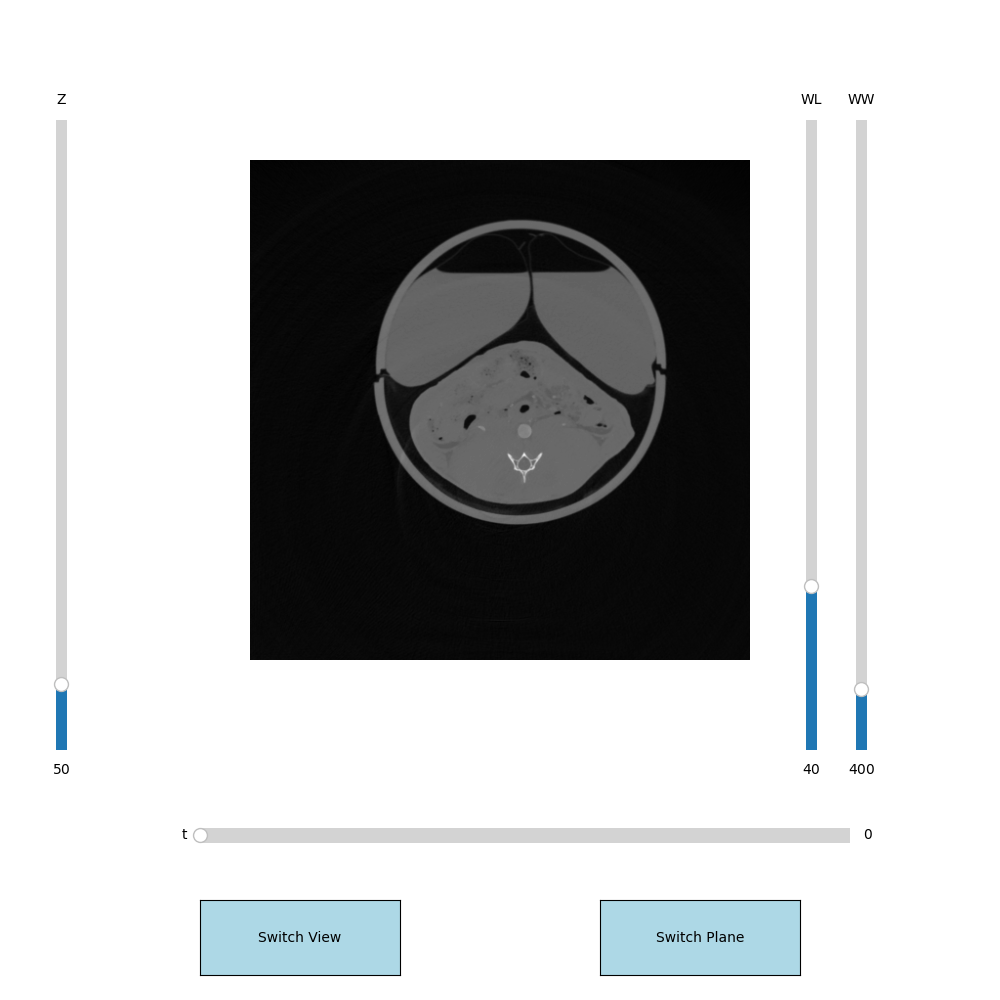

    Signal_HU    Noise_HU    CNR_HU  Signal_Kedge  Noise_Kedge  CNR_Kedge
0  -83.157895  -94.880952  1.290405      0.065263     0.068571  -0.043323
1  111.842105  121.904762 -0.865627      0.882105     0.867619   0.232418
2  131.947368  142.047619 -0.683258      1.218947     1.287143  -0.210202
3  174.894737  190.642857 -0.533170      1.923158     2.000952  -0.182775
4  130.473684  143.785714 -0.470140      1.274737     1.365714  -0.248880


c:\Users\Chris\OneDrive\2023\BME_M2\STAGE\Thesis\Scripts_and_venv\internship_M2\SPCCT_4D.py:471: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.data = pd.concat([self.data, new_data], ignore_index=True)


In [18]:
%matplotlib widget
from SPCCT_4D import VesselAnalyzer
VesselAnalyzer(sample)

(512, 512, 480)


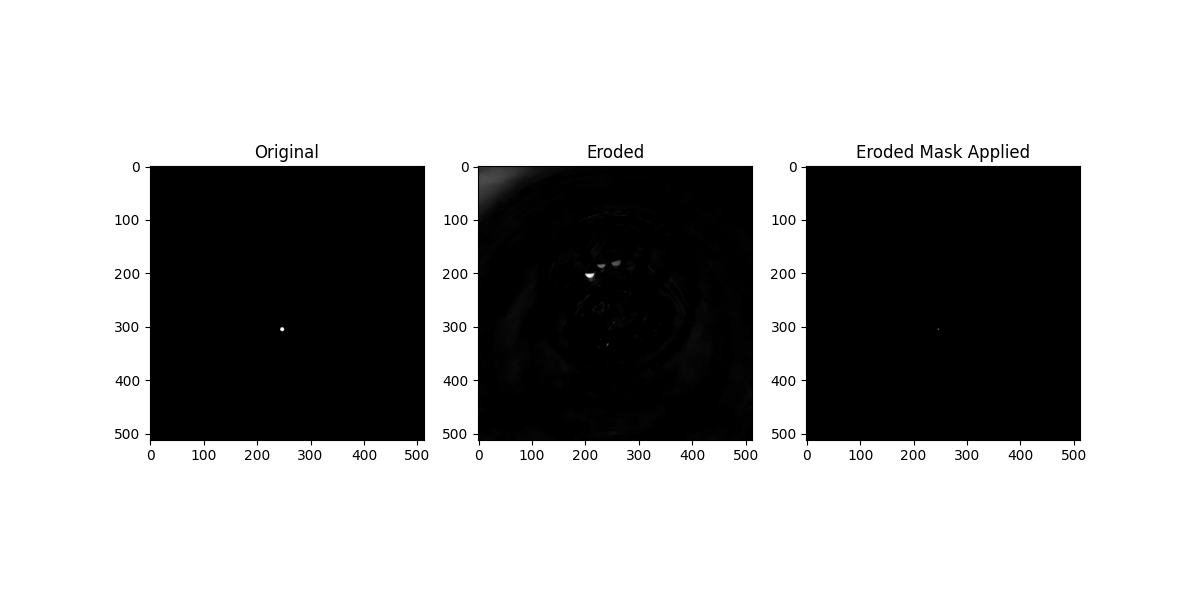

Mean Signal: 4.232266539288274
Standard Deviation of Signal: 1.349635833600835


In [57]:
import numpy as np
import matplotlib.pyplot as plt
import nrrd
from skimage import morphology as MM
from SPCCT_4D import Sample

# Load your data
readdata, header = nrrd.read("D:/3d_masks/kedge_aorta_s1.seg.nrrd")
sampview = s1

# Flip both the x and y axes to mimic a 180-degree rotation about the z-axis
flipped_data = np.swapaxes(readdata, 0, 1)

# Apply erosion slice-by-slice
eroded_data = np.zeros_like(flipped_data)
for i in range(flipped_data.shape[2]):
    eroded_data[:, :, i] = MM.erosion(flipped_data[:, :, i], MM.disk(3))

print(eroded_data.shape)

# Plot to compare
plt.figure(figsize=(12, 6))
n = 51
plt.subplot(1, 3, 1)
plt.imshow(flipped_data[:, :, n], cmap='gray')
plt.title("Original")

plt.subplot(1, 3, 2)
plt.imshow(sampview.acquisition[0].kedge[:, :, n], cmap='gray')
plt.title("Eroded")

plt.subplot(1, 3, 3)
plt.imshow(eroded_data[:, :, n] * sampview.acquisition[0].kedge[:, :, n], cmap='gray')
plt.title("Eroded Mask Applied")

plt.show()

# Apply eroded mask to the conventional image
masked_signal = eroded_data * sampview.acquisition[0].kedge

# Calculate mean and standard deviation of the masked signal
indices = np.where(eroded_data == 1)
mean_signal = np.mean(masked_signal[indices])
std_signal = np.std(masked_signal[indices])

print("Mean Signal:", mean_signal)
print("Standard Deviation of Signal:", std_signal)


c:\Users\Chris\OneDrive\2023\BME_M2\STAGE\Thesis\Scripts_and_venv\internship_M2\SPCCT_4D.py:40: SyntaxWarning: invalid escape sequence '\c'
  base_path = f"D:\copyRaw\Rabbit_AGUIX_" + rabbit_id


AttributeError: 'numpy.ndarray' object has no attribute 'acquisition'

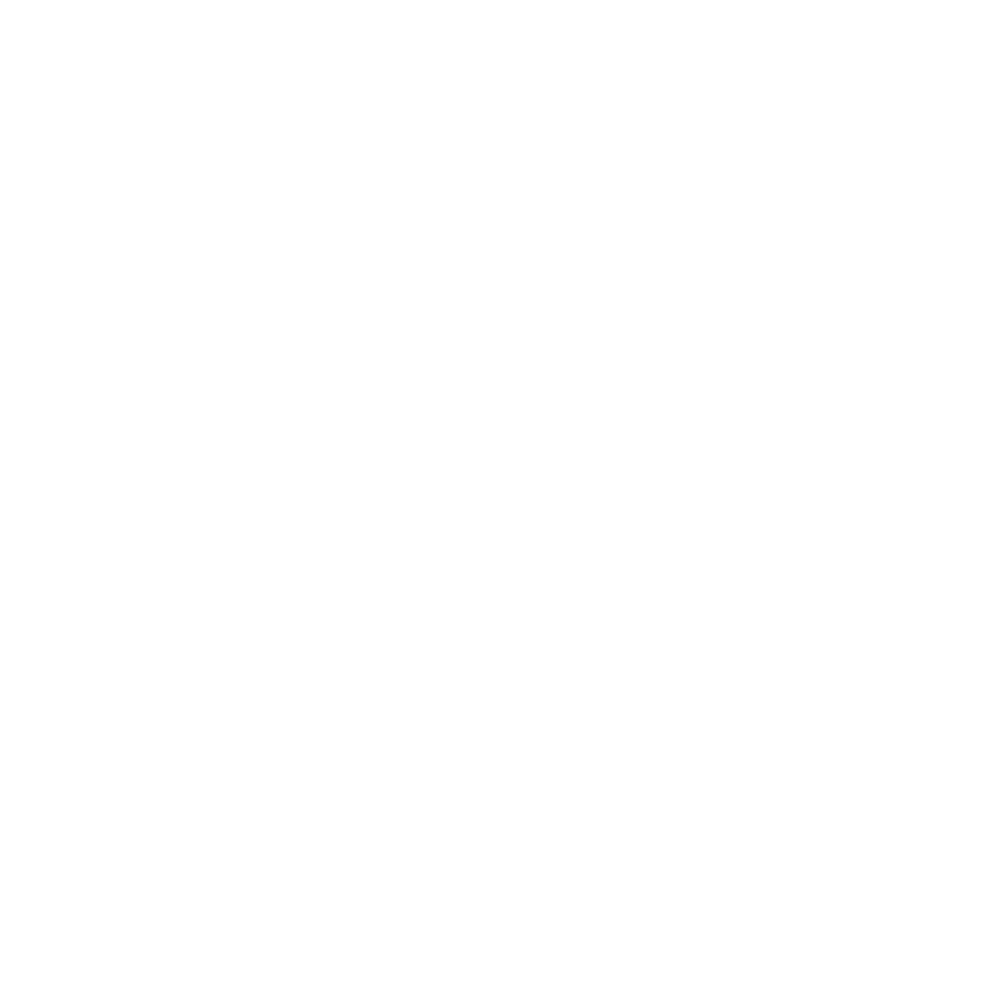

In [7]:
%matplotlib widget
from SPCCT_4D import Sample, Timepoint, Viewer,VesselAnalyzer, vesselDiameter
Viewer(cono_de_la_madre)

In [1]:
%matplotlib widget
from SPCCT_4D import Sample, Viewer, vesselDiameter
sample = Sample("1")

Available directories:
0: 2021_01_25.4531.300.2024_03_17.AGUIX_Rabbit_26201_h00000
1: 2021_01_25.4531.400.2024_03_15.AGUIX_Rabbit_26201_f00001
2: 2021_01_25.4531.500.2024_03_15.AGUIX_Rabbit_26201_f00002
3: 2021_01_25.4531.600.2024_03_15.AGUIX_Rabbit_26201_f00003
4: 2021_01_25.4531.700.2024_03_15.AGUIX_Rabbit_26201_f00004
Conventional file 1 total DICOM files found: 480
Spectral/k_gadolinium file 1 total DICOM files found: 480
Conventional file 2 total DICOM files found: 480
Spectral/k_gadolinium file 2 total DICOM files found: 480
Conventional file 3 total DICOM files found: 480
Spectral/k_gadolinium file 3 total DICOM files found: 480
Conventional file 4 total DICOM files found: 480
Spectral/k_gadolinium file 4 total DICOM files found: 480
Conventional file 5 total DICOM files found: 480
Spectral/k_gadolinium file 5 total DICOM files found: 480


In [ ]:
vesselDiameter(sample)

Available directories:
0: 2021_01_25.4531.300.2024_03_17.AGUIX_Rabbit_26201_h00000
1: 2021_01_25.4531.400.2024_03_15.AGUIX_Rabbit_26201_f00001
2: 2021_01_25.4531.500.2024_03_15.AGUIX_Rabbit_26201_f00002
3: 2021_01_25.4531.600.2024_03_15.AGUIX_Rabbit_26201_f00003
4: 2021_01_25.4531.700.2024_03_15.AGUIX_Rabbit_26201_f00004
Conventional file 1 total DICOM files found: 480
Spectral/k_gadolinium file 1 total DICOM files found: 480
Conventional file 2 total DICOM files found: 480
Spectral/k_gadolinium file 2 total DICOM files found: 480
Conventional file 3 total DICOM files found: 480
Spectral/k_gadolinium file 3 total DICOM files found: 480
Conventional file 4 total DICOM files found: 480
Spectral/k_gadolinium file 4 total DICOM files found: 480
Conventional file 5 total DICOM files found: 480
Spectral/k_gadolinium file 5 total DICOM files found: 480
Mask data shape after filtering: (512, 512, 438)
(438,)
6.324555320336759
9.797958971132712
7.577736953646617
1.3144971134766674
10.0
6.0


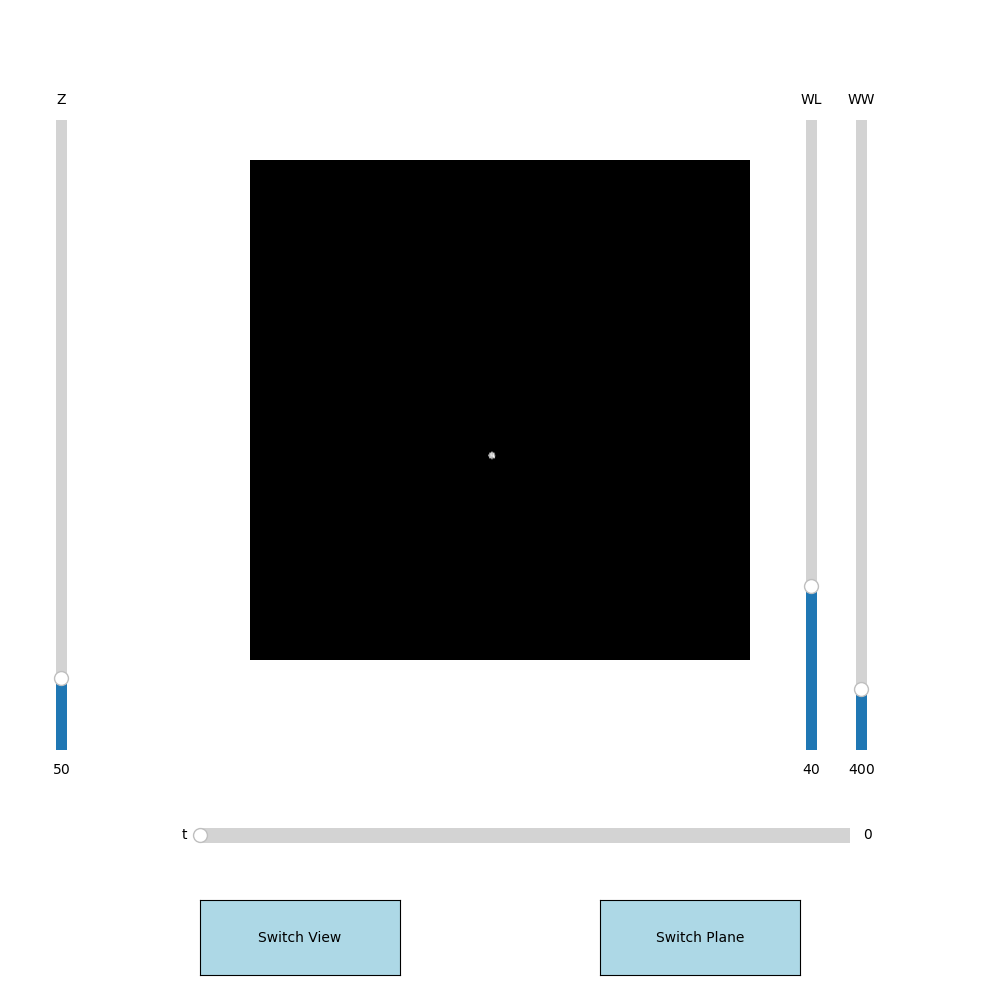

In [3]:
#Viewer(s2)
%matplotlib widget
import nrrd
import numpy as np
import scipy.ndimage as ndi
ready3d = Sample("1") 
readdata, header = nrrd.read("D:/3d_masks/kedge_aorta_s1.seg.nrrd")
readdata = np.swapaxes(readdata, 0, 1)

presence = np.any(readdata == 1, axis=(0, 1))
readdata = readdata[:, :, presence]  # Filter mask data to only include relevant slices
print("Mask data shape after filtering:", readdata.shape)

for i in range(0,5):
    if ready3d.acquisition[i].conventional.shape[2] > presence.shape[0]:
        # Ensure the acquisition data has enough slices to match the mask data slice count
        ready3d.acquisition[i].conventional = ready3d.acquisition[i].conventional[:, :, presence]
        ready3d.acquisition[i].kedge = ready3d.acquisition[i].kedge[:, :, presence]
        
    ready3d.acquisition[i].conventional = readdata*ready3d.acquisition[i].conventional[:,:,presence]
    ready3d.acquisition[i].kedge = readdata*ready3d.acquisition[i].kedge[:,:,presence]
    # Apply the same slicing to the image acquisition data

#ready3d.acquisition[1].conventional = readdata*ready3d.acquisition[1].conventional

diameters = 2*np.max(ndi.distance_transform_edt(readdata), axis = (0,1))
indices = np.where(ndi.distance_transform_edt(diameters) > 0.5)
diameters = diameters[indices]
print(diameters.shape)
diameters = diameters[0:240]
print(diameters[0])
print(diameters[239])
print(np.mean(diameters))
print(np.std(diameters))
print(max(diameters))
print(min(diameters))
Viewer(ready3d)

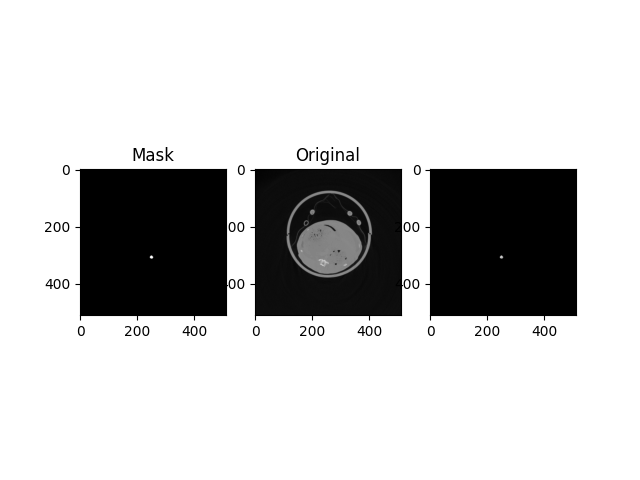

In [3]:
from SPCCT_4D import vesselDiameter
%matplotlib widget
import matplotlib.pyplot as plt
import nrrd
import numpy as np
#s5 = Sample("5")
samp = s1
readdata, header = nrrd.read("D:/3d_masks/aorta_s1.seg.nrrd")
readdata = np.swapaxes(readdata, 0 , 1)
# Clear the current figure (if any) to start fresh
plt.clf()
# Create a subplot for the mask
plt.subplot(1, 3, 1)
plt.imshow(readdata[:, :, 450], cmap='gray')  # Assuming the slice index 250 is correct
plt.title("Mask")

# Create a subplot for the original image
plt.subplot(1, 3, 2)
plt.imshow(s1.acquisition[1].conventional[:, :, 450], cmap='gray')  # Ensure the index is correctly aligned with your data
plt.title("Original")


plt.subplot(1,3,3)
plt.imshow(readdata[:, :, 450]*samp.acquisition[1].conventional[:, :, 450], cmap = 'gray')
# Show the plots
plt.show()
#plt.clf()
#samp.acquisition[1].conventional = readdata*s1.acquisition[1].conventional
#Viewer(samp)
#samp.acquisition[0].conventional[:,:,0:239] = samp.acquisition[0].conventional[:,:,240:479]
#samp.acquisition[0].conventional = samp.acquisition[0].conventional[:,:,0:239]

# Load previously made mask to evaluate quality
#vesselDiameter(samp, "Masks\\IVC_s4_292_t1.npy")
#vesselDiameter(samp, "Vessel_Masks\\SAA_d5_167.npy")
#vesselDiameter(samp, "Kidney_Masks\\r_cortex_d5_41.npy")

#vesselDiameter(samp, "D:/3d_masks/aorta_s1.seg.nrrd")


Available directories:
0: 2021_01_25.4537.300.2024_03_18.AGUIX_Rabbit_26285_b00000
1: 2021_01_25.4537.400.2024_03_16.AGUIX_Rabbit_26285_a00001
2: 2021_01_25.4537.500.2024_03_16.AGUIX_Rabbit_26285_a00002
3: 2021_01_25.4537.600.2024_03_16.AGUIX_Rabbit_26285_a00003
4: 2021_01_25.4537.700.2024_03_16.AGUIX_Rabbit_26285_a00004
Conventional file 1 total DICOM files found: 480
Spectral/k_gadolinium file 1 total DICOM files found: 480
Conventional file 2 total DICOM files found: 480
Spectral/k_gadolinium file 2 total DICOM files found: 480
Conventional file 3 total DICOM files found: 480
Spectral/k_gadolinium file 3 total DICOM files found: 480
Conventional file 4 total DICOM files found: 480
Spectral/k_gadolinium file 4 total DICOM files found: 480
Conventional file 5 total DICOM files found: 480
Spectral/k_gadolinium file 5 total DICOM files found: 480


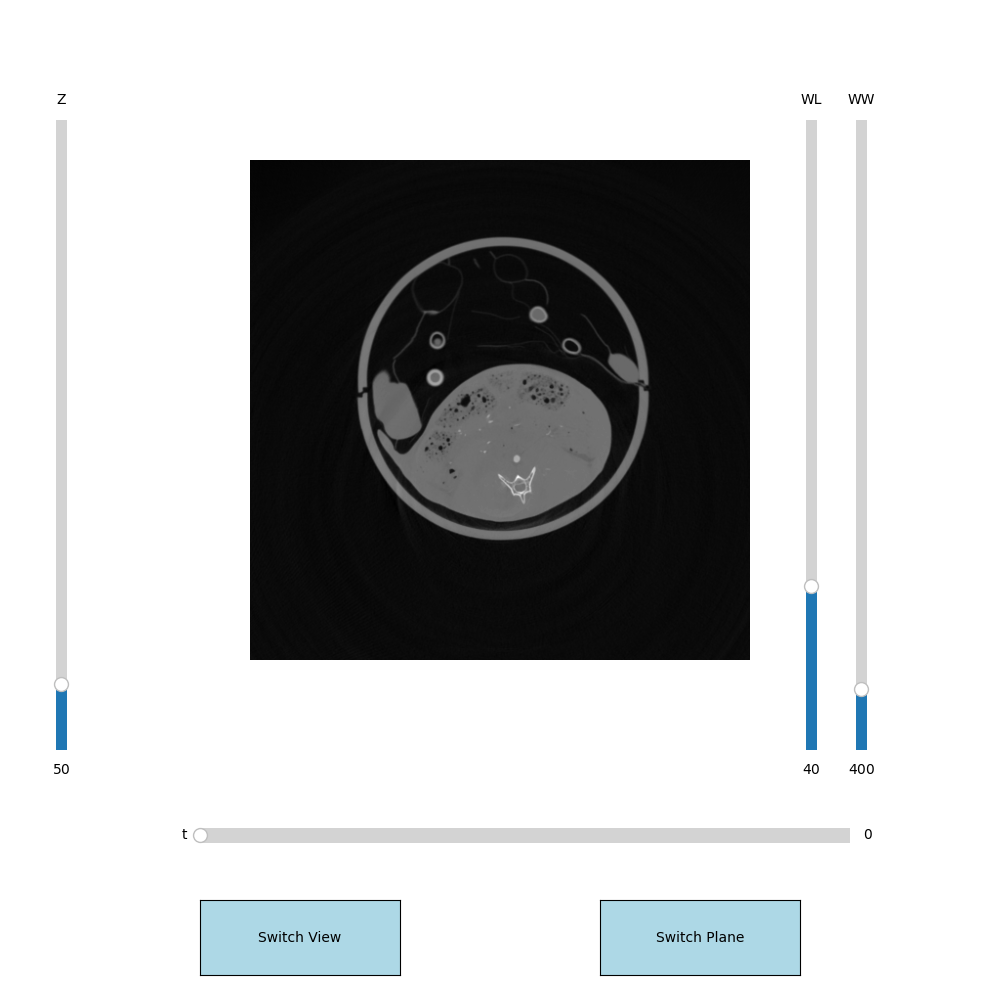

In [1]:

%matplotlib widget
from SPCCT_4D import Viewer, Sample
Viewer(Sample("4"))

Maximum pixel value (mg/mL):14.680000000000001
Minimum pixel value (mg/mL):-5.948928136453843e-27


<Figure size 640x480 with 0 Axes>

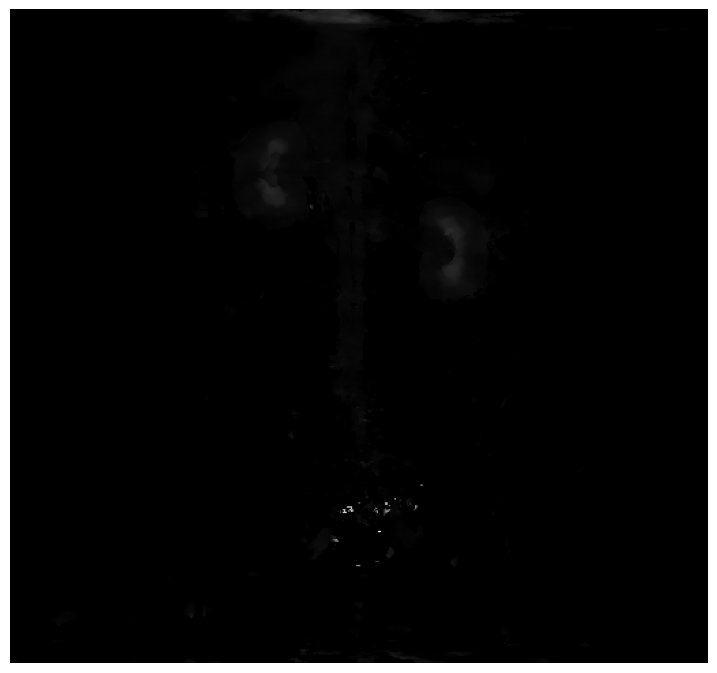

<Figure size 640x480 with 0 Axes>

In [79]:
import SPCCT_4D  # Assuming this is your custom library
import scipy.ndimage as ndi  # You import but do not use this, consider removing if not needed
import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage as ndi

#Assuming Sample is a function or class that loads image data
#image = SPCCT_4D.Sample("2")

def apply_window(image, level, width):
    lower = level - (width / 2)
    upper = level + (width / 2)
    return np.clip(image, lower, upper)

plt.clf()
plt.figure(figsize=(9, 9))
# Maximum Intensity Projection (MIP)
#plt.subplot(1, 3, 1)

#axial = ndimage.rotate(image.acquisition[0].conventional, 45, axes = (0,1), cval = -100)

#np.any(axial == 0)

#doosy = axial[200:375, :, :]
#mip = np.max(apply_window(doosy, 225, 650), axis = 0)

#print(f"Maximum pixel value (HU):{np.max(doosy)}")
#print(f"Minimum pixel value (HU):{np.min(doosy)}")
#plt.imshow(np.rot90(mip), cmap="gray")

# Mean Intensity Projection
#plt.subplot(1, 3, 2)
thresh = image.acquisition[1].kedge > 0.39

kedge_mip = np.rot90(np.max(ndi.rotate(image.acquisition[4].kedge[290:310,:,:]*thresh[290:310,:,:], 0, axes = (0,1), cval = 0), axis=0))
#kedge_mip = np.rot90(np.max(ndi.rotate(image.acquisition[4].conventional[290:310,:,:], 0, axes = (0,1), cval = 0), axis=0))
plt.imshow(kedge_mip, cmap="gray")

print(f"Maximum pixel value (mg/mL):{np.max(kedge_mip)}")
print(f"Minimum pixel value (mg/mL):{np.min(kedge_mip)}")
plt.axis("off")
plt.show()
plt.savefig("clean_image.pdf", bbox_inches='tight', pad_inches=0, format='pdf', dpi=300)

In [169]:
plt.subplot(1,2,1)
plt.imshow(np.max(image.acquisition[0].conventional[200:400, :,:], axis = 0), cmap = 'gray')

plt.subplot(1,2,2)
plt.imshow(np.max(image.acquisition[0].kedge[200:400, :,:], axis = 0), cmap = 'gray')

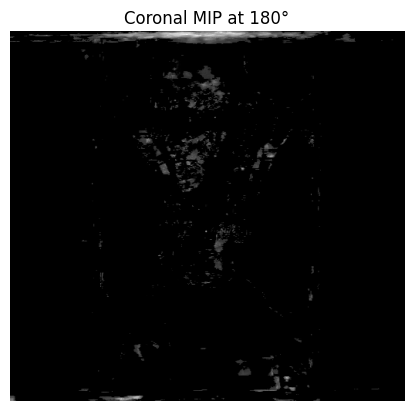

In [80]:
import numpy as np
import scipy.ndimage as ndimage
import matplotlib.pyplot as plt
import imageio

# Example data: Create a random 3D array to simulate a volume
data = image.acquisition[1].kedge
thresh = data > 0.39  # Dimensions [depth, height, width]
data = data*thresh
def normalize_image(image):
    image_min = np.min(image)
    image_max = np.max(image)
    # Normalize to [0, 1]
    normalized_image = (image - image_min) / (image_max - image_min)
    # Scale to [0, 255]
    scaled_image = (normalized_image * 255).astype(np.uint8)
    return scaled_image

def rotate_and_extract_mip(data, angle, start_depth, end_depth):
    # Rotate the volume around the Y-axis
    
    rotated = ndimage.rotate(data, angle, axes=(0, 1), reshape=False, mode='nearest', cval = 0)
    # Compute MIP over the specified depth range for a coronal slice
    mip = np.rot90(np.max(rotated[ start_depth:end_depth, :, :], axis=0))
    mip = normalize_image(mip)
    return mip

# Parameters for the rotation and MIP extraction
angles = np.linspace(0, 360, num=36)  # Generate 36 frames for a full rotation
start_depth = 290  # Start of the depth range for the MIP
end_depth = 310   # End of the depth range for the MIP

frames = []
for angle in angles:
    frame = rotate_and_extract_mip(data, angle, start_depth, end_depth)
    frames.append(frame)

# Optionally save as a GIF
imageio.mimsave('rotating_coronal_mip.gif', frames, duration=0.1)

# Show one of the frames as an example
plt.imshow(frames[18], cmap='gray')  # Show the frame at 180 degrees
plt.title('Coronal MIP at 180°')
plt.axis('off')
plt.show()



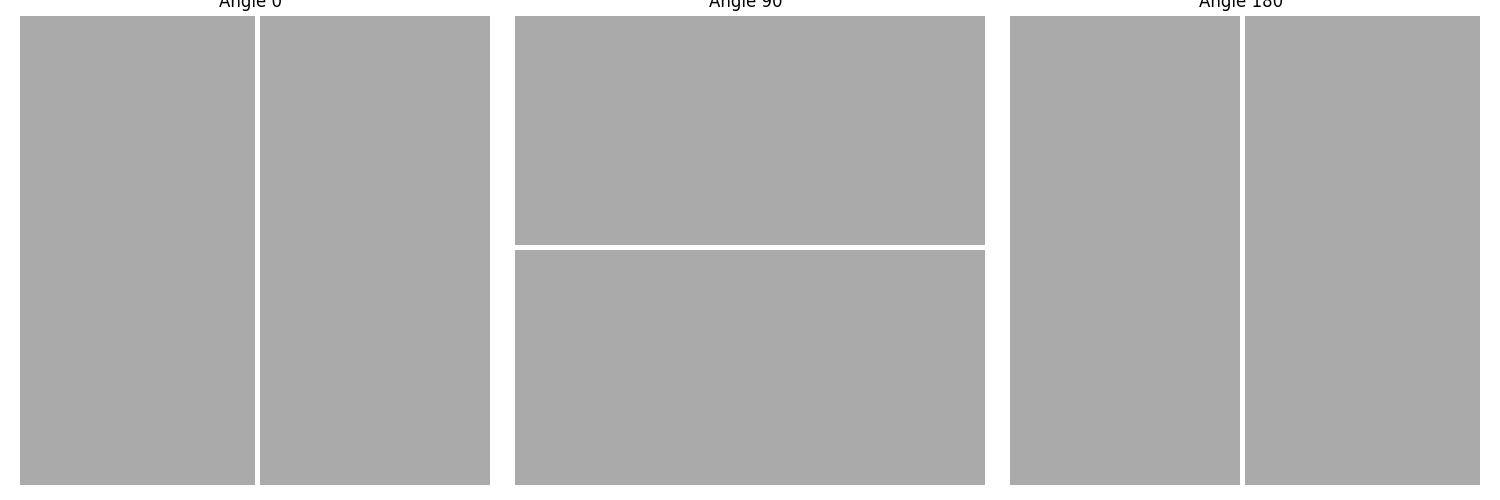

In [115]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage as ndimage

# Create a diagnostic volume
data = np.zeros((100, 100, 100))
data[50, :, :] = 1  # Mark the middle slice along depth (Z-axis)
data[:, 50, :] = 2  # Mark the middle slice along height (Y-axis)
data[:, :, 50] = 3  # Mark the middle slice along width (X-axis)

fig, axs = plt.subplots(1, 3, figsize=(15, 5))
angles = [0, 90, 180]

# Rotate around what we consider the Y-axis
for i, angle in enumerate(angles):
    rotated = ndimage.rotate(data, angle, axes=(0, 2), reshape=False)
    # Displaying the slice along the Y-axis to view rotation effects on X and Z
    axs[i].imshow(rotated[:, 50, :], cmap='gray', vmin=0, vmax=3)
    axs[i].set_title(f'Angle {angle}°')
    axs[i].axis('off')

plt.tight_layout()
plt.show()


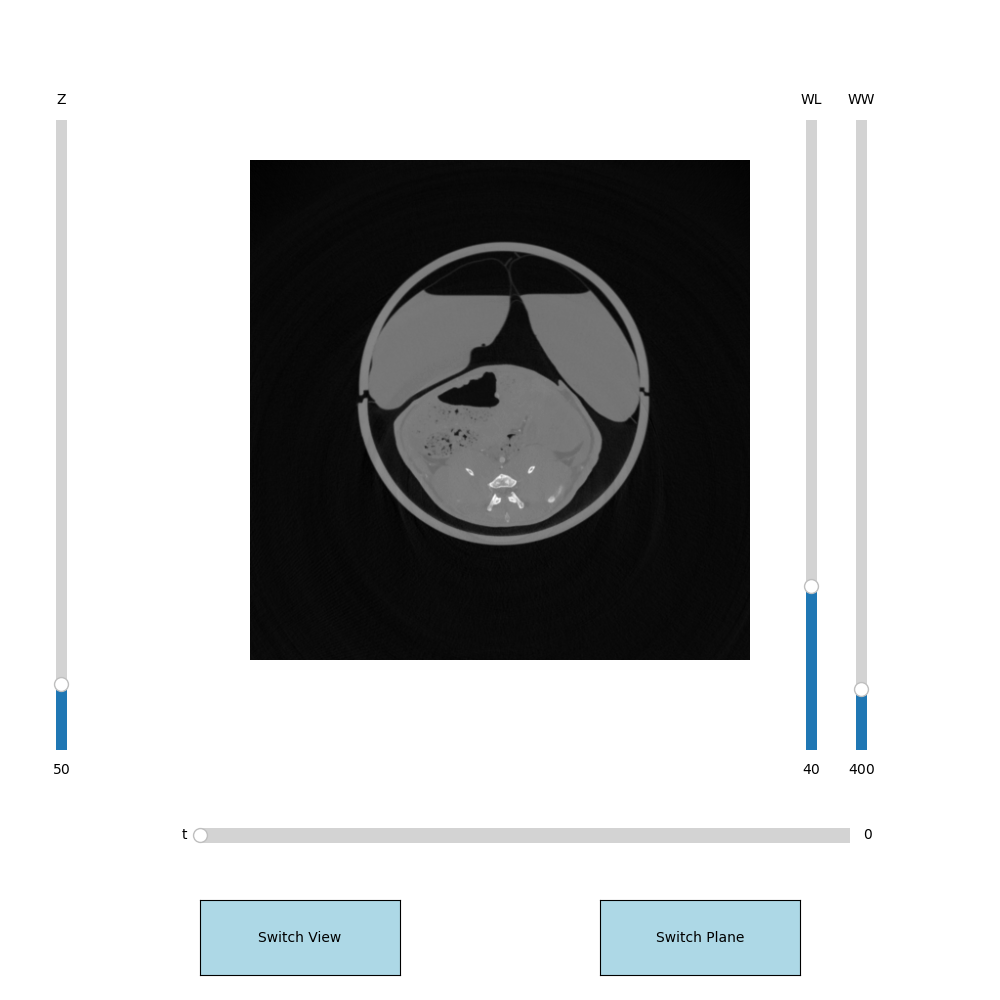

Processing the selection...
275
    Signal_HU    Noise_HU    CNR_HU  Signal_Kedge  Noise_Kedge  CNR_Kedge
0  526.600000  433.962441  0.499447      8.118333     6.701221   0.694570
1   35.000000  -73.676056  0.434113      0.000000     0.013803  -0.226383
2    6.133333 -109.286385  0.422331      0.002333     0.018122  -0.196607
3   22.816667 -108.624413  0.453326      0.000000     0.000188  -0.068680
4  -33.316667 -214.882629  0.475843      0.010333     0.001784   0.503862


c:\Users\Chris\OneDrive\2023\BME_M2\STAGE\Thesis\Scripts_and_venv\internship_M2\SPCCT_4D.py:335: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.data = pd.concat([self.data, new_data], ignore_index=True)


In [178]:
vesselDiameter(image)